In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

data = cifar10.load_data()
data

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [2]:
cifar10.load_data??

Signature: cifar10.load_data()
Source:   
@keras_export("keras.datasets.cifar10.load_data")
def load_data():
    """Loads the CIFAR10 dataset.

    This is a dataset of 50,000 32x32 color training images and 10,000 test
    images, labeled over 10 categories. See more info at the
    [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).

    The classes are:

    | Label | Description |
    |:-----:|-------------|
    |   0   | airplane    |
    |   1   | automobile  |
    |   2   | bird        |
    |   3   | cat         |
    |   4   | deer        |
    |   5   | dog         |
    |   6   | frog        |
    |   7   | horse       |
    |   8   | ship        |
    |   9   | truck       |

    Returns:
        Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(50000, 32, 32, 3)`, containing the training data. Pixel values range
      from 0 to 255.

    **`y_train`**: `uint8` NumPy 

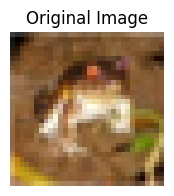

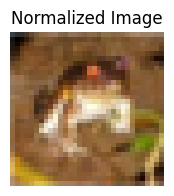

In [3]:
import numpy as np
from keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

# Before normalization
plt.figure(figsize=(2, 2))
plt.imshow(X_train[0])
plt.title('Original Image')
plt.axis('off')
plt.show()

# After normalization
plt.figure(figsize=(2, 2))
plt.imshow(X_train_normalized[0])
plt.title('Normalized Image')
plt.axis('off')
plt.show()

In [4]:
# Flatten images
X_train_flattened = X_train_normalized.reshape(X_train_normalized.shape[0], -1)
X_test_flattened = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

# Display the shape of the flattened data
print("Shape of X_train_flattened:", X_train_flattened.shape)
print("Shape of X_test_flattened:", X_test_flattened.shape)

Shape of X_train_flattened: (50000, 3072)
Shape of X_test_flattened: (10000, 3072)


In [5]:
import numpy as np
from skimage.transform import resize

# Define new dimensions for resizing
new_height = 64
new_width = 64

# Resize training images
X_train_resized = np.array([resize(img, (new_height, new_width)) for img in X_train_normalized])

# Resize test images
X_test_resized = np.array([resize(img, (new_height, new_width)) for img in X_test_normalized])

# Display the shape of the resized data
print("Shape of X_train_resized:", X_train_resized.shape)
print("Shape of X_test_resized:", X_test_resized.shape)

Shape of X_train_resized: (50000, 64, 64, 3)
Shape of X_test_resized: (10000, 64, 64, 3)


In [6]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_resized, y_train, test_size=0.2, random_state=42)

# Display the shapes of the split datasets
print("Shape of X_train_split:", X_train_split.shape)
print("Shape of X_val_split:", X_val_split.shape)
print("Shape of y_train_split:", y_train_split.shape)
print("Shape of y_val_split:", y_val_split.shape)

Shape of X_train_split: (40000, 64, 64, 3)
Shape of X_val_split: (10000, 64, 64, 3)
Shape of y_train_split: (40000, 1)
Shape of y_val_split: (10000, 1)


In [7]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# # Define parameters for LightGBM
# params = {
#     'objective': 'multiclass',
#     'num_class': 10,  # Number of classes in CIFAR-10
#     'boosting_type': 'gbdt',
#     'num_leaves': 31,
#     'learning_rate': 0.05,
#     'feature_fraction': 0.9,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'verbose': 0
# }

# # Initialize the LGBMClassifier
# lgb_classifier = LGBMClassifier(**params)

# # Train the LGBMClassifier
# lgb_classifier.fit(X_train_split.reshape(-1, 64 * 64 * 3), y_train_split)

# # Predict on validation set
# y_pred = lgb_classifier.predict(X_val_split.reshape(-1, 64 * 64 * 3))

# # Calculate accuracy
# accuracy = accuracy_score(y_val_split, y_pred)
# print("Validation Accuracy:", accuracy)

D:\UNF\Courses\Sem 3\ML\Assignments\Project 3\myenv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\UNF\Courses\Sem 3\ML\Assignments\Project 3\myenv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 

In [9]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train_split.reshape(-1, 64 * 64 * 3), y_train_split)

D:\UNF\Courses\Sem 3\ML\Assignments\Project 3\myenv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\UNF\Courses\Sem 3\ML\Assignments\Project 3\myenv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 6.538987 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3132534
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 12288
[LightGBM] [Info] Start training from score -2.295858
[LightGBM] [Info] Start training from score -2.297349
[LightGBM] [Info] Start training from score -2.310113
[LightGBM] [Info] Start training from score -2.308352
[LightGBM] [Info] Start training from score -2.285974
[LightGBM] [Info] Start training from score -2.306342
[LightGBM] [Info] Start training from score -2.301586
[LightGBM] [Info] Start training from score -2.301086
[LightGBM] [Info] Start training from score -2.306844
[LightGBM] [Info] Start training from score -2.312635


LGBMClassifier()

In [10]:
y_pred=clf.predict(X_val_split.reshape(-1, 64 * 64 * 3))

In [11]:
accuracy = accuracy_score(y_val_split, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.5226
